In [110]:
#importing libraries
from __future__ import print_function
import numpy as np
import pandas as pd


In [111]:
!pip install xlrd

In [112]:
#reading data saved from local directory
df= pd.read_csv('/Users/upasanadhar/Documents/Lakes/ML with Python/datasets/mldata/OGA_Field_Production_PPRS_WGS84.csv',index_col=0)
df.head()


,FIELDNAME,FIELDAREA,ORGGRPNM,UNITNAME,UNITTYPCOD,UNITTYPDES,LOCATION,PERIODDATE,PERIODYRMN,PERIODMNTH,...,GCONDMBD,GCONDDEN,INJWATMASS,INJWATVOL,INJWATMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,SHAPESTArea,SHAPESTLength
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,AFFLECK,CNS,TOTAL UPSTREAM UK LIMITED,AFFLECK,P,Oil Field Exporting to Pipeline,Offshore,2009-08-15T00:00:00.000Z,200908,8,...,NaN,NaN,0.0,0.0,0.0,419.0,419.0,0.085016,0.003698,0.268108
2,AFFLECK,CNS,TOTAL UPSTREAM UK LIMITED,AFFLECK,P,Oil Field Exporting to Pipeline,Offshore,2009-09-15T00:00:00.000Z,200909,9,...,NaN,NaN,0.0,0.0,0.0,15.0,15.0,0.003145,0.003698,0.268108
3,AFFLECK,CNS,TOTAL UPSTREAM UK LIMITED,AFFLECK,P,Oil Field Exporting to Pipeline,Offshore,2009-10-15T00:00:00.000Z,200910,10,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,0.003698,0.268108
4,AFFLECK,CNS,TOTAL UPSTREAM UK LIMITED,AFFLECK,P,Oil Field Exporting to Pipeline,Offshore,2009-11-15T00:00:00.000Z,200911,11,...,NaN,NaN,0.0,0.0,0.0,11.0,11.0,0.002306,0.003698,0.268108
5,AFFLECK,CNS,TOTAL UPSTREAM UK LIMITED,AFFLECK,P,Oil Field Exporting to Pipeline,Offshore,2009-12-15T00:00:00.000Z,200912,12,...,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.000203,0.003698,0.268108


In [113]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18, 7]

In [114]:
#converting into pandas daatframe
df_prod=pd.DataFrame(df)

In [115]:
#Selecting columns of interest
df_prod_1=df_prod[['FIELDNAME','PERIODYR','OILPRODMAS','WATPRODMAS']]
df_prod_1.head()


,FIELDNAME,PERIODYR,OILPRODMAS,WATPRODMAS
OBJECTID,,,,
1,AFFLECK,2009,8471.7230,419.0
2,AFFLECK,2009,666.8886,15.0
3,AFFLECK,2009,0.0000,0.0
4,AFFLECK,2009,289.8888,11.0
5,AFFLECK,2009,25.0950,1.0


In [116]:
df_prod_water=df[['FIELDNAME','PERIODYR','WATPRODMAS']]
df_prod_water.head()

,FIELDNAME,PERIODYR,WATPRODMAS
OBJECTID,,,
1,AFFLECK,2009,419.0
2,AFFLECK,2009,15.0
3,AFFLECK,2009,0.0
4,AFFLECK,2009,11.0
5,AFFLECK,2009,1.0


In [117]:
#Rename columns
df_prod_1.rename(columns={'OBJECTID':'ID','FIELDNAME':'Fieldname','PERIODYR':'Year','OILPRODMAS':'Oil produced','WATPRODMAS':'Water produced'},inplace=True)
df_prod_1.head()

,Fieldname,Year,Oil produced,Water produced
OBJECTID,,,,
1,AFFLECK,2009,8471.7230,419.0
2,AFFLECK,2009,666.8886,15.0
3,AFFLECK,2009,0.0000,0.0
4,AFFLECK,2009,289.8888,11.0
5,AFFLECK,2009,25.0950,1.0


In [118]:
df_prod_water.rename(columns={'OBJECTID':'ID','FIELDNAME':'Fieldname','PERIODYR':'Year','WATPRODMAS':'Water produced'},inplace=True)
df_prod_water.head()

,Fieldname,Year,Water produced
OBJECTID,,,
1,AFFLECK,2009,419.0
2,AFFLECK,2009,15.0
3,AFFLECK,2009,0.0
4,AFFLECK,2009,11.0
5,AFFLECK,2009,1.0


In [119]:
#Check shape
df_prod.shape

(106578, 36)

In [120]:
df_prod_yr=df_prod_1.groupby(['Year']).sum()
df_prod_yr

,Oil produced,Water produced
Year,,
1975,1.114720e+06,3.500000e+01
1976,1.152336e+07,2.288780e+05
1977,3.726740e+07,1.981692e+06
1978,5.236667e+07,3.017759e+06
1979,7.607495e+07,4.143538e+06
1980,7.861514e+07,7.343198e+06
1981,8.729747e+07,1.282589e+07
1982,9.866316e+07,1.990154e+07
1983,1.079741e+08,2.456517e+07


In [121]:
df_prod_water=df_prod_water.groupby(['Year']).sum()
df_prod_water

,Water produced
Year,
1975,3.500000e+01
1976,2.288780e+05
1977,1.981692e+06
1978,3.017759e+06
1979,4.143538e+06
1980,7.343198e+06
1981,1.282589e+07
1982,1.990154e+07
1983,2.456517e+07


In [122]:
df_prod_yr=df_prod_yr.div(1000)

In [123]:
df_prod_water=df_prod_water.div(1000)

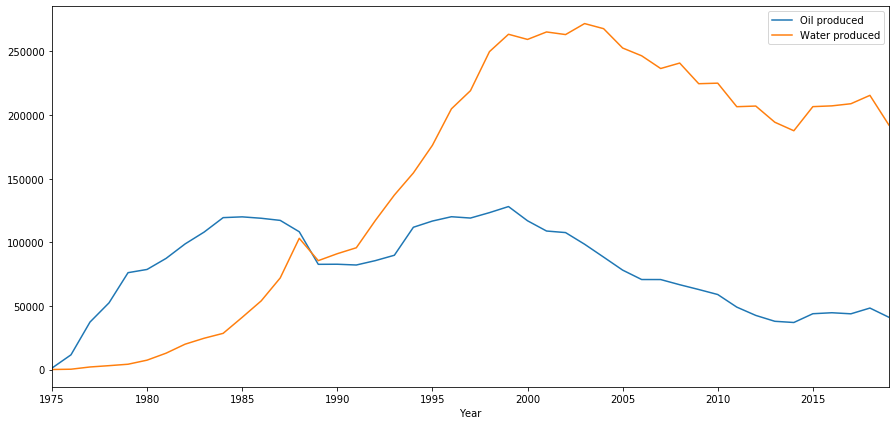

In [124]:
fig, ax = plt.subplots(figsize=(15,7))
df_prod_fig=df_prod_yr.groupby(['Year']).sum().plot(ax=ax)


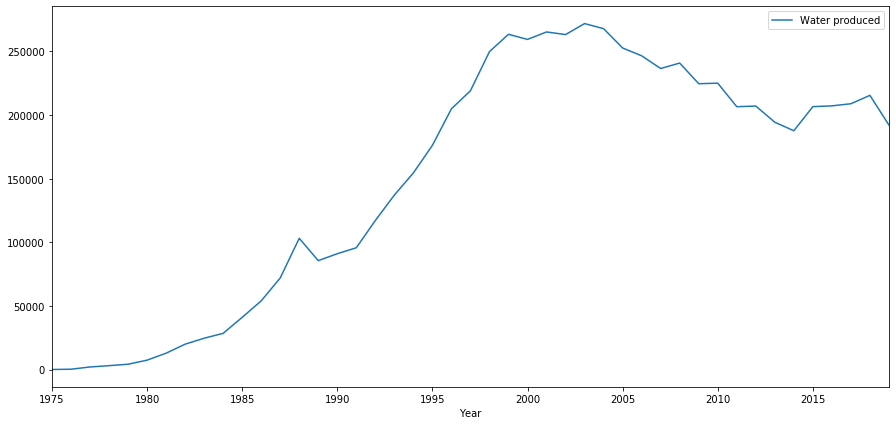

In [125]:
fig, ax = plt.subplots(figsize=(15,7))
df_prod_water=df_prod_water.groupby(['Year']).sum().plot(ax=ax)


In [126]:
df_prod_area=df_prod[['FIELDNAME','PERIODYR','OILPRODMAS']]

df_prod_area.head()


,FIELDNAME,PERIODYR,OILPRODMAS
OBJECTID,,,
1,AFFLECK,2009,8471.7230
2,AFFLECK,2009,666.8886
3,AFFLECK,2009,0.0000
4,AFFLECK,2009,289.8888
5,AFFLECK,2009,25.0950


In [127]:
df_prod_area=df_prod_area.groupby(['FIELDNAME']).sum()
df_prod_area

,PERIODYR,OILPRODMAS
FIELDNAME,,
AFFLECK,173089,5.639877e+05
AIRTH COAL BED METHANE DEVT.,187431,0.000000e+00
ALBA,621990,6.371174e+07
ALBURY,619971,0.000000e+00
ALDER,72642,6.434550e+05
...,...,...
WREN,217017,0.000000e+00
WYTCH FARM,973493,6.438061e+07
YARE,694570,0.000000e+00


In [128]:
df_prod_area.rename(columns={'FIELDNAME':'Fieldname','PERIODYR':'Year','OILPRODMAS':'Oil produced'},inplace=True)
df_prod_area.head()

,Year,Oil produced
FIELDNAME,,
AFFLECK,173089,5.639877e+05
AIRTH COAL BED METHANE DEVT.,187431,0.000000e+00
ALBA,621990,6.371174e+07
ALBURY,619971,0.000000e+00
ALDER,72642,6.434550e+05


In [129]:
df_prod_area.shape

(513, 2)

In [130]:
df_prod_area=df_prod_area.div(1000)
df_prod_area

,Year,Oil produced
FIELDNAME,,
AFFLECK,173.089,563.987698
AIRTH COAL BED METHANE DEVT.,187.431,0.000000
ALBA,621.990,63711.742414
ALBURY,619.971,0.000000
ALDER,72.642,643.455029
...,...,...
WREN,217.017,0.000000
WYTCH FARM,973.493,64380.609657
YARE,694.570,0.000000


In [131]:
df3 = df_prod_area[df_prod_area['Oil produced'] > 65000]  
df3

,Year,Oil produced
FIELDNAME,,
BERYL,1040.762,112230.375474
BRENT,1028.905,260139.896503
BUZZARD,309.990,99707.190381
CLAYMORE,1007.160,83102.345733
FORTIES,1056.543,370133.940579
FULMAR,880.000,74014.353372
MAGNUS,870.525,114702.765187
NINIAN,981.448,165685.369191
PIPER,1022.927,138737.662302


In [132]:
df3 = df3.sort_values('Oil produced',ascending=True)
df3


,Year,Oil produced
FIELDNAME,,
STATFJORD,941.746,73936.046880
FULMAR,880.000,74014.353372
CLAYMORE,1007.160,83102.345733
BUZZARD,309.990,99707.190381
BERYL,1040.762,112230.375474
MAGNUS,870.525,114702.765187
PIPER,1022.927,138737.662302
NINIAN,981.448,165685.369191
BRENT,1028.905,260139.896503


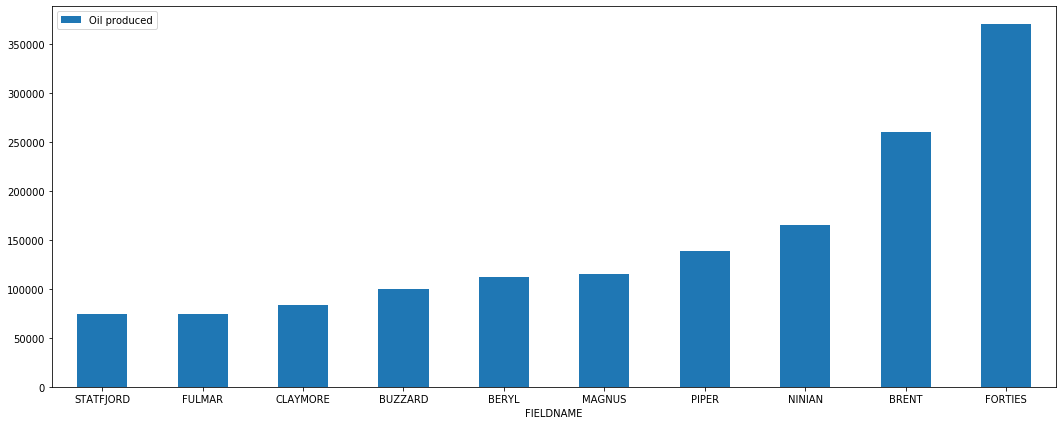

In [133]:
plt.rcParams["figure.figsize"] = [18, 7] # Field areas with amt of oil produced is > 65000 over all the years 
df3 = df3.plot.bar(y='Oil produced', rot=0)


In [134]:
condition=df_prod_1['Year']==2019

df_cond=df_prod_1[condition]
df_cond

,Fieldname,Year,Oil produced,Water produced
OBJECTID,,,,
387,ALBA,2019,58311.8298,1133813.0
388,ALBA,2019,49019.3088,1058647.0
389,ALBA,2019,51000.1515,1148495.0
390,ALBA,2019,49713.7680,1080474.0
391,ALBA,2019,52334.8035,1086043.0
...,...,...,...,...
106574,WHISBY,2019,261.6170,956.3
106575,WHISBY,2019,232.3090,807.1
106576,WHISBY,2019,232.3090,949.3


In [135]:
df_prod_cond=df_cond.groupby(['Fieldname']).sum()
df_prod_cond

,Year,Oil produced,Water produced
Fieldname,,,
AIRTH COAL BED METHANE DEVT.,18171,0.00000,0.0
ALBA,20190,453266.50730,9495783.2
ALBURY,18171,0.00000,53.0
ALDER,20190,64453.53000,285.0
ALMA,20190,121850.56000,1693267.0
...,...,...,...
WINGATE,20190,0.00000,0.0
WOOD,20190,36723.68280,34834.0
WYTCH FARM,18171,466440.55940,13819517.2


In [136]:
df_prod_cond = df_prod_cond[df_prod_cond['Oil produced'] > 1000000]  
df_prod_cond

,Year,Oil produced,Water produced
Fieldname,,,
BUZZARD,20190,4.314526e+06,9582819.0
CAPTAIN,20190,1.208753e+06,15503487.0
CATCHER,20190,1.380545e+06,163333.3
CLAIR-PHASE 1 [Part of CLAIR],20190,1.463141e+06,1099297.0
CLAIR-RIDGE [Part of CLAIR],20190,1.263532e+06,50987.0
FORTIES,20190,1.100509e+06,20046199.0
GOLDEN EAGLE,20190,1.184886e+06,2576013.0
HARRIS,20190,1.050472e+06,538311.9
KRAKEN,20190,1.348532e+06,2697345.0


In [137]:
df_prod_cond.shape

(10, 3)

In [138]:
df4 = df_prod_cond.sort_values('Oil produced',ascending=True)
df4

,Year,Oil produced,Water produced
Fieldname,,,
HARRIS,20190,1.050472e+06,538311.9
FORTIES,20190,1.100509e+06,20046199.0
GOLDEN EAGLE,20190,1.184886e+06,2576013.0
CAPTAIN,20190,1.208753e+06,15503487.0
CLAIR-RIDGE [Part of CLAIR],20190,1.263532e+06,50987.0
KRAKEN,20190,1.348532e+06,2697345.0
CATCHER,20190,1.380545e+06,163333.3
CLAIR-PHASE 1 [Part of CLAIR],20190,1.463141e+06,1099297.0
SCHIEHALLION,20190,3.067852e+06,4713900.0


In [139]:
#df4['Fieldname'].replace({'CLAIR-RIDGE [Part of CLAIR]': 'CLAIR-RIDGE', 'CLAIR-PHASE 1 [Part of CLAIR]': 'CLAIR-PHASE'})
df4=df4.rename(index={'CLAIR-RIDGE [Part of CLAIR]': "CLAIR-RIDGE", 'CLAIR-PHASE 1 [Part of CLAIR]': "CLAIR-PHASE"})
df4

,Year,Oil produced,Water produced
Fieldname,,,
HARRIS,20190,1.050472e+06,538311.9
FORTIES,20190,1.100509e+06,20046199.0
GOLDEN EAGLE,20190,1.184886e+06,2576013.0
CAPTAIN,20190,1.208753e+06,15503487.0
CLAIR-RIDGE,20190,1.263532e+06,50987.0
KRAKEN,20190,1.348532e+06,2697345.0
CATCHER,20190,1.380545e+06,163333.3
CLAIR-PHASE,20190,1.463141e+06,1099297.0
SCHIEHALLION,20190,3.067852e+06,4713900.0


In [140]:
#df4= df4.plot.bar(y='Oil produced', rot=0)# Filed areas where amt of Oil produced is >10,000 in the year of 2019 

,Year,Oil produced,Water produced
Fieldname,,,
HARRIS,20190,1.050472e+06,538311.9
FORTIES,20190,1.100509e+06,20046199.0
GOLDEN EAGLE,20190,1.184886e+06,2576013.0
CAPTAIN,20190,1.208753e+06,15503487.0
CLAIR-RIDGE,20190,1.263532e+06,50987.0
KRAKEN,20190,1.348532e+06,2697345.0
CATCHER,20190,1.380545e+06,163333.3
CLAIR-PHASE,20190,1.463141e+06,1099297.0
SCHIEHALLION,20190,3.067852e+06,4713900.0


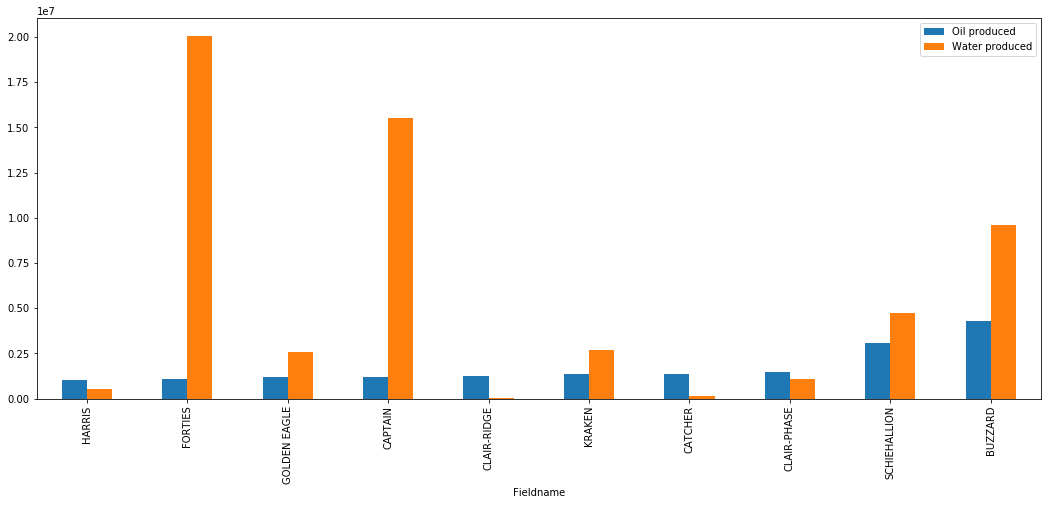

In [141]:
df4.plot(y=["Oil produced", "Water produced"], kind="bar")
df4

In [ ]:
#reading data saved from local directory
df= pd.read_csv('/Users/upasanadhar/Documents/Lakes/ML with Python/datasets/mldata/OGA_Exploration_and_Appraisal_wells.csv',index_col=0)
df.head()